# Import

In [1]:
import copy
import gc

import cv2 as cv
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# 画像読み込み

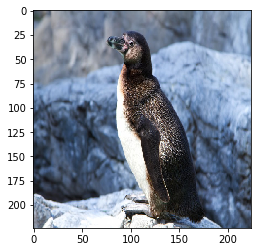

In [2]:
IMAGE_PATH = "./Penguin.jpg"

img224 = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=(224, 224))
img299 = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=(299, 299))

plt.figure(figsize=(4, 4))
plt.imshow(img224)
plt.show()

# Grad-CAM

In [3]:
from tf_explain.core.grad_cam import GradCAM

### VGG16

In [4]:
with tf.device("CPU:0"):
    model = tf.keras.applications.vgg16.VGG16(weights="imagenet", include_top=True)
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [5]:
temp_image = copy.deepcopy(img224)
reshape_image = tf.keras.preprocessing.image.img_to_array(temp_image).reshape(1, 224, 224, 3)
data = tf.keras.applications.vgg16.preprocess_input(reshape_image)

with tf.device("CPU:0"):
    predict_result = model.predict(data)

result_num = 3
top_result = tf.keras.applications.vgg16.decode_predictions(predict_result, top=result_num)

print(np.argmax(np.squeeze(predict_result)), top_result)

145 [[('n02056570', 'king_penguin', 0.6873524), ('n02361337', 'marmot', 0.26503083), ('n02441942', 'weasel', 0.0117413895)]]


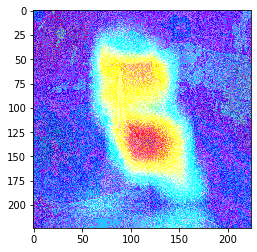

In [6]:
penguin_class_index = 145
explainer = GradCAM()

with tf.device("CPU:0"):
    grid = explainer.explain(
        (data, None), model, class_index=penguin_class_index, layer_name="block5_conv3", colormap=cv.COLORMAP_JET
    )

plt.figure(figsize=(4, 4))
plt.imshow(grid)
plt.show()

In [7]:
# del model
# gc.collect()

### MobileNetV2

In [8]:
with tf.device("CPU:0"):
    model = tf.keras.applications.mobilenet_v2.MobileNetV2(weights="imagenet", include_top=True)
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [9]:
temp_image = copy.deepcopy(img224)
reshape_image = tf.keras.preprocessing.image.img_to_array(temp_image).reshape(1, 224, 224, 3)
data = tf.keras.applications.mobilenet_v2.preprocess_input(reshape_image)

with tf.device("CPU:0"):
    predict_result = model.predict(data)

result_num = 3
top_result = tf.keras.applications.mobilenet_v2.decode_predictions(predict_result, top=result_num)

print(np.argmax(np.squeeze(predict_result)), top_result)

145 [[('n02056570', 'king_penguin', 0.8437901), ('n02077923', 'sea_lion', 0.016957799), ('n01796340', 'ptarmigan', 0.0162769)]]


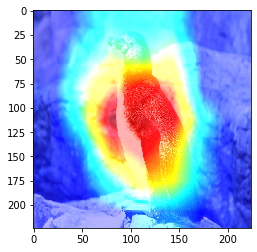

In [10]:
penguin_class_index = 145
explainer = GradCAM()

with tf.device("CPU:0"):
    grid = explainer.explain(
        (data, None), model, class_index=penguin_class_index, layer_name="out_relu", colormap=cv.COLORMAP_JET
        # (data, None), model, class_index=penguin_class_index, layer_name="block_16_expand_relu", colormap=cv.COLORMAP_JET
    )

plt.figure(figsize=(4, 4))
plt.imshow(grid)
plt.show()

In [11]:
# del model
# gc.collect()

### ResNet50

In [12]:
with tf.device("CPU:0"):
    model = tf.keras.applications.resnet50.ResNet50(weights="imagenet", include_top=True)
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [13]:
temp_image = copy.deepcopy(img224)
reshape_image = tf.keras.preprocessing.image.img_to_array(temp_image).reshape(1, 224, 224, 3)
data = tf.keras.applications.resnet50.preprocess_input(reshape_image)

with tf.device("CPU:0"):
    predict_result = model.predict(data)

result_num = 3
top_result = tf.keras.applications.resnet50.decode_predictions(predict_result, top=result_num)

print(np.argmax(np.squeeze(predict_result)), top_result)

145 [[('n02056570', 'king_penguin', 0.9810113), ('n02077923', 'sea_lion', 0.014188737), ('n02134084', 'ice_bear', 0.0012934555)]]


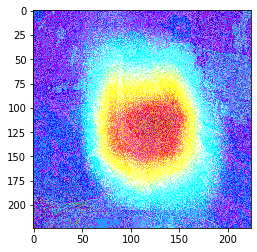

In [14]:
penguin_class_index = 145
explainer = GradCAM()

with tf.device("CPU:0"):
    grid = explainer.explain(
        (data, None), model, class_index=penguin_class_index, layer_name="conv5_block3_3_conv", colormap=cv.COLORMAP_JET
    )

plt.figure(figsize=(4, 4))
plt.imshow(grid)
plt.show()

In [15]:
# del model
# gc.collect()

### Xception

In [16]:
with tf.device("CPU:0"):
    model = tf.keras.applications.xception.Xception(weights="imagenet", include_top=True)
model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [17]:
temp_image = copy.deepcopy(img299)
reshape_image = tf.keras.preprocessing.image.img_to_array(temp_image).reshape(1, 299, 299, 3)
data = tf.keras.applications.xception.preprocess_input(reshape_image)

with tf.device("CPU:0"):
    predict_result = model.predict(data)

result_num = 3
top_result = tf.keras.applications.resnet50.decode_predictions(predict_result, top=result_num)

print(np.argmax(np.squeeze(predict_result)), top_result)

145 [[('n02056570', 'king_penguin', 0.5559889), ('n02361337', 'marmot', 0.02510273), ('n02077923', 'sea_lion', 0.023385659)]]


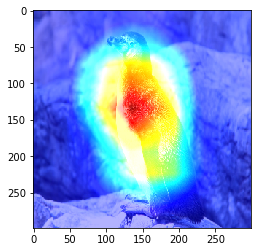

In [18]:
penguin_class_index = 145
explainer = GradCAM()

with tf.device("CPU:0"):
    grid = explainer.explain(
        (data, None), model, class_index=penguin_class_index, layer_name="block14_sepconv2_act", colormap=cv.COLORMAP_JET
    )

plt.figure(figsize=(4, 4))
plt.imshow(grid)
plt.show()

In [19]:
# del model
# gc.collect()

# Activations Visualization

In [20]:
from tf_explain.core.activations import ExtractActivations

### VGG16

In [21]:
with tf.device("CPU:0"):
    model = tf.keras.applications.vgg16.VGG16(weights="imagenet", include_top=True)
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

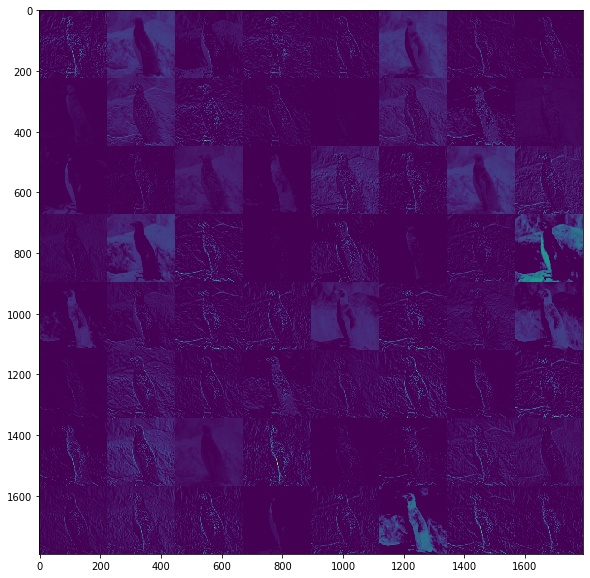

In [22]:
temp_image = copy.deepcopy(img224)
reshape_image = tf.keras.preprocessing.image.img_to_array(temp_image).reshape(1, 224, 224, 3)
data = tf.keras.applications.vgg16.preprocess_input(reshape_image)

penguin_class_index = 145
explainer = ExtractActivations()

with tf.device("CPU:0"):
    grid = explainer.explain(
        (data, None), model, layers_name="block1_conv1"
    )

plt.figure(figsize=(10, 10))
plt.imshow(grid)
plt.show()

In [23]:
# del model
# gc.collect()

# Vanilla Gradients

In [44]:
from tf_explain.core.vanilla_gradients import VanillaGradients

### VGG16

In [45]:
with tf.device("CPU:0"):
    model = tf.keras.applications.vgg16.VGG16(weights="imagenet", include_top=True)
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

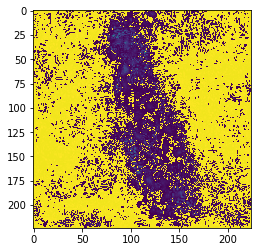

In [46]:
temp_image = copy.deepcopy(img224)
reshape_image = tf.keras.preprocessing.image.img_to_array(temp_image).reshape(1, 224, 224, 3)
data = tf.keras.applications.vgg16.preprocess_input(reshape_image)

penguin_class_index = 145
explainer = VanillaGradients()

with tf.device("CPU:0"):
    grid = explainer.explain(
        (data, None), model, class_index=penguin_class_index
    )

plt.figure(figsize=(4, 4))
plt.imshow(grid)
plt.show()

In [27]:
# del model
# gc.collect()

# Gradients Inputs

In [28]:
from tf_explain.core.gradients_inputs import GradientsInputs

### VGG16

In [29]:
with tf.device("CPU:0"):
    model = tf.keras.applications.vgg16.VGG16(weights="imagenet", include_top=True)
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

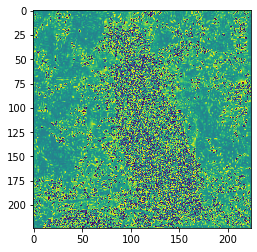

In [30]:
temp_image = copy.deepcopy(img224)
reshape_image = tf.keras.preprocessing.image.img_to_array(temp_image).reshape(1, 224, 224, 3)
data = tf.keras.applications.vgg16.preprocess_input(reshape_image)

penguin_class_index = 145
explainer = GradientsInputs()

with tf.device("CPU:0"):
    grid = explainer.explain(
        (data, None), model, class_index=penguin_class_index
    )

plt.figure(figsize=(4, 4))
plt.imshow(grid)
plt.show()

In [31]:
# del model
# gc.collect()

# Occlusion Sensitivity

In [32]:
from tf_explain.core.occlusion_sensitivity import OcclusionSensitivity

### VGG16

In [33]:
with tf.device("CPU:0"):
    model = tf.keras.applications.vgg16.VGG16(weights="imagenet", include_top=True)
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

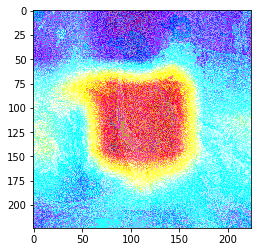

In [34]:
temp_image = copy.deepcopy(img224)
reshape_image = tf.keras.preprocessing.image.img_to_array(temp_image).reshape(1, 224, 224, 3)
data = tf.keras.applications.vgg16.preprocess_input(reshape_image)

penguin_class_index = 145
explainer = OcclusionSensitivity()

with tf.device("CPU:0"):
    grid = explainer.explain(
        (data, None), model, class_index=penguin_class_index, patch_size=32, colormap=cv.COLORMAP_JET
    )

plt.figure(figsize=(4, 4))
plt.imshow(grid)
plt.show()

In [35]:
# del model
# gc.collect()

# Smooth Grad

In [36]:
from tf_explain.core.smoothgrad import SmoothGrad

### VGG16

In [37]:
with tf.device("CPU:0"):
    model = tf.keras.applications.vgg16.VGG16(weights="imagenet", include_top=True)
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

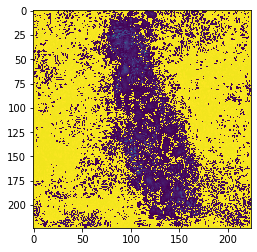

In [38]:
temp_image = copy.deepcopy(img224)
reshape_image = tf.keras.preprocessing.image.img_to_array(temp_image).reshape(1, 224, 224, 3)
data = tf.keras.applications.vgg16.preprocess_input(reshape_image)

penguin_class_index = 145
explainer = SmoothGrad()

with tf.device("CPU:0"):
    grid = explainer.explain(
        (data, None), model, class_index=penguin_class_index, num_samples=5, noise=1.0
    )

plt.figure(figsize=(4, 4))
plt.imshow(grid)
plt.show()

In [39]:
# del model
# gc.collect()

# Integrated Gradients

In [40]:
from tf_explain.core.integrated_gradients import IntegratedGradients

### VGG16

In [41]:
with tf.device("CPU:0"):
    model = tf.keras.applications.vgg16.VGG16(weights="imagenet", include_top=True)
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

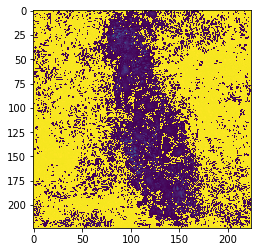

In [42]:
temp_image = copy.deepcopy(img224)
reshape_image = tf.keras.preprocessing.image.img_to_array(temp_image).reshape(1, 224, 224, 3)
data = tf.keras.applications.vgg16.preprocess_input(reshape_image)

penguin_class_index = 145
explainer = IntegratedGradients()

with tf.device("CPU:0"):
    grid = explainer.explain(
        (data, None), model, class_index=penguin_class_index, n_steps=10
    )

plt.figure(figsize=(4, 4))
plt.imshow(grid)
plt.show()

In [43]:
# del model
# gc.collect()